In [2]:
import numpy as np, local
from matplotlib.pyplot import *
cycle = rcParams['axes.prop_cycle'].by_key()['color']

Using CAMB 1.3.2 installed at /global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/camb


In [14]:
root = '/global/u1/t/toshiyan/Work/Ongoing/S4/data/cmb_noise/'

In [15]:
nl = np.loadtxt(root+'S4_190604d_2LAT_pol_default_noisecurves_deproj0_SENS0_mask_16000_ell_EE_BB.txt',unpack=True)

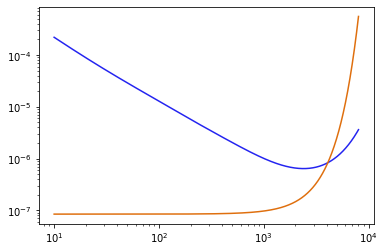

In [24]:
l = nl[0]
loglog(l,nl[1])
loglog(l,(1*np.pi/180/60)**2*np.exp(l*(l+1)*(3*np.pi/10800)**2/8/np.log(2.)))

In [3]:
Lmax = 2000

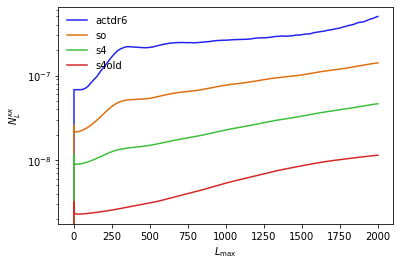

In [6]:
xlabel(r'$L_{\rm max}$')
ylabel(r'$N^{\kappa\kappa}_L$')
yscale('log')
L = np.linspace(0,Lmax,Lmax+1)
for c, exp in enumerate(['actdr6','so','s4','s4old']):
    nlkk = np.zeros(Lmax+1)
    if exp == 'actdr6':
        nlkk[3:] = np.loadtxt(local.root+'nldd/ACTDR6.dat',unpack=True)[1][:Lmax-2]
    if exp == 'so':
        nlkk[2:] = np.loadtxt(local.root+'nldd/so/kappa_deproj0_sens2_16000_lT30-3000_lP30-5000.dat',unpack=True)[7][:Lmax-1]
    if exp == 's4':
        nlkk[2:] = np.loadtxt(local.root+'nldd/kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat',unpack=True)[7][:Lmax-1]
    if exp == 's4old':
        nlkk[2:] = np.loadtxt(local.root+'nldd/S4_s1_t3_rlmax4000.dat',unpack=True)[1][:Lmax-1]
        nlkk *= L**2*(L+1)**2/(4.)
    plot(L,nlkk,color=cycle[c],label=exp)
legend()